In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

In [ ]:
#Mounted Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive


/content/drive/MyDrive


In [ ]:
#Extract zip file dataset
import zipfile

zip_path = '/content/drive/Shareddrives/CLICK/Dataset/MainDataset.zip'  # Replace with the actual path to your zip file
extract_path = '/content/drive/Shareddrives/CLICK/Dataset/MainDataset'  # Replace with the desired path to extract the contents

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

#Error bellow causes, the file has been extracted

KeyboardInterrupt: ignored

In [ ]:
#Info dataset
print('Info train data for defect: ', len(os.listdir('/content/drive/Shareddrives/CLICK/Dataset/PngDataset/train/defect')))
print('Info train data for longberry: ', len(os.listdir('/content/drive/Shareddrives/CLICK/Dataset/PngDataset/train/longberry')))
print('Info train data for peaberry: ', len(os.listdir('/content/drive/Shareddrives/CLICK/Dataset/PngDataset/train/peaberry')))
print('Info train data for premium: ', len(os.listdir('/content/drive/Shareddrives/CLICK/Dataset/PngDataset/train/premium')))

Info train data for defect:  1129
Info train data for longberry:  1159
Info train data for peaberry:  1153
Info train data for premium:  1095


In [ ]:
#CONVERT JPG TO PNG
"""
from PIL import Image
import os

def convert_jpg_to_png(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get the list of files in the input folder
    file_list = os.listdir(input_folder)

    for file_name in file_list:
        if file_name.endswith('.jpg'):
            # Open the JPG image using PIL
            image = Image.open(os.path.join(input_folder, file_name))

            # Create the output file path by replacing the file extension
            output_file = os.path.splitext(file_name)[0] + '.png'
            output_path = os.path.join(output_folder, output_file)

            # Convert and save the image as PNG
            image.save(output_path, 'PNG')

            print(f"Converted {file_name} to {output_file}")

# Specify the input and output folders
input_folder = '/content/drive/Shareddrives/CLICK/Dataset/MainDataset/test/premium'
output_folder = '/content/drive/Shareddrives/CLICK/Dataset/PngDataset/test/premium'

# Convert JPG to PNG
convert_jpg_to_png(input_folder, output_folder)
"""

Converted 1709.jpg to 1709.png
Converted 1970.jpg to 1970.png
Converted 1959.jpg to 1959.png
Converted 1689.jpg to 1689.png
Converted 1964.jpg to 1964.png
Converted 1993.jpg to 1993.png
Converted 1997.jpg to 1997.png
Converted 1952.jpg to 1952.png
Converted 1675.jpg to 1675.png
Converted 1667.jpg to 1667.png
Converted 1984.jpg to 1984.png
Converted 1998.jpg to 1998.png
Converted 1983.jpg to 1983.png
Converted 1980.jpg to 1980.png
Converted 1948.jpg to 1948.png
Converted 1991.jpg to 1991.png
Converted 1995.jpg to 1995.png
Converted 1986.jpg to 1986.png
Converted 1974.jpg to 1974.png
Converted 1962.jpg to 1962.png
Converted 1994.jpg to 1994.png
Converted 1976.jpg to 1976.png
Converted 1981.jpg to 1981.png
Converted 1971.jpg to 1971.png
Converted 1968.jpg to 1968.png
Converted 1996.jpg to 1996.png
Converted 1999.jpg to 1999.png
Converted 1990.jpg to 1990.png
Converted 1985.jpg to 1985.png
Converted 1992.jpg to 1992.png
Converted 1969.jpg to 1969.png
Converted 1987.jpg to 1987.png
Converte

In [ ]:
from keras.preprocessing import image

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

TRAINING_DIR = '/content/drive/Shareddrives/CLICK/Dataset/MainDataset/train/'
train_datagen = image.ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)


train_generator = train_datagen.flow_from_directory(directory = TRAINING_DIR,
                                                    batch_size = BATCH_SIZE,
                                                    target_size = IMG_SIZE,
                                                    class_mode = 'categorical',
                                                    shuffle = True,
                                                    )


TESTING_DIR = '/content/drive/Shareddrives/CLICK/Dataset/MainDataset/test/'
datagen = image.ImageDataGenerator(rescale = 1.0/255.0)

test_generator = datagen.flow_from_directory(directory = TESTING_DIR,
                                             batch_size = BATCH_SIZE,
                                             target_size = IMG_SIZE,
                                             class_mode = 'categorical',
                                             shuffle = False,
                                             )
# Take x_test and y_test from generator
x_test, y_test = next(test_generator)

VALIDATION_DIR = '/content/drive/Shareddrives/CLICK/Dataset/MainDataset/val/'

val_generator = datagen.flow_from_directory(directory = VALIDATION_DIR,
                                            batch_size = BATCH_SIZE,
                                            target_size = IMG_SIZE,
                                            class_mode = 'categorical',
                                            shuffle = True,
                                            )



Found 4651 images belonging to 4 classes.
Found 1544 images belonging to 4 classes.
Found 1540 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(directory = TRAINING_DIR,
                                             batch_size = BATCH_SIZE,
                                             image_size = IMG_SIZE,
                                             shuffle = True)

Found 4651 files belonging to 4 classes.


In [ ]:
#Class info
class_names = train_dataset.class_names

print(class_names)

['defect', 'longberry', 'peaberry', 'premium']


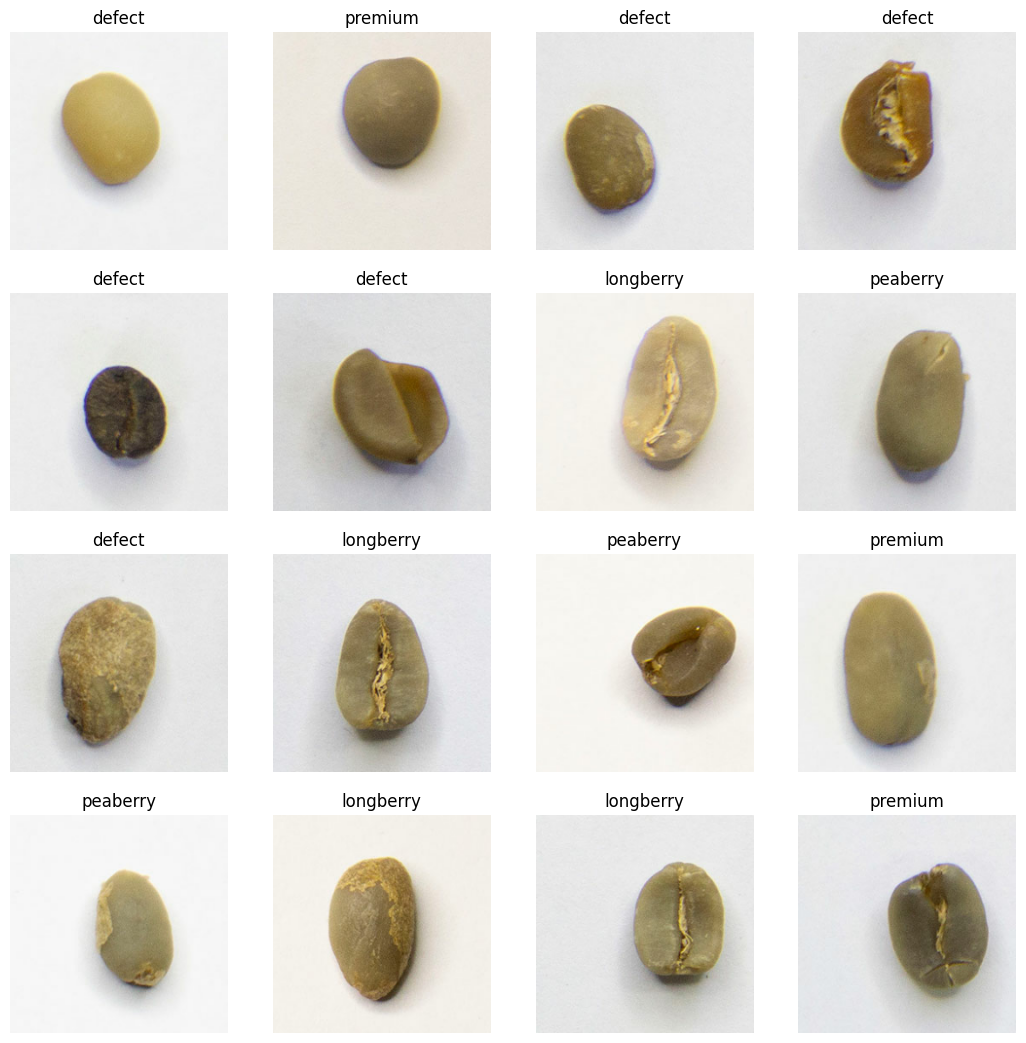

In [ ]:
#Show dataset picture
plt.figure(figsize=(13, 13))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
#Pre Trained Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape= (224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 128)     

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch=len(train_generator),
                    validation_data=(val_generator),
                    verbose=1,
                    validation_steps=len(val_generator)
)

Epoch 1/10
146/146 [==============================] - 1466s 10s/step - loss: 1.3319 - accuracy: 0.3518 - val_loss: 1.2092 - val_accuracy: 0.4006
Epoch 2/10
146/146 [==============================] - 863s 6s/step - loss: 1.1445 - accuracy: 0.5023 - val_loss: 1.1570 - val_accuracy: 0.4760
Epoch 3/10
146/146 [==============================] - 855s 6s/step - loss: 1.0169 - accuracy: 0.5822 - val_loss: 1.1235 - val_accuracy: 0.4851
Epoch 4/10
146/146 [==============================] - 857s 6s/step - loss: 0.9292 - accuracy: 0.6317 - val_loss: 1.0123 - val_accuracy: 0.5597
Epoch 5/10
146/146 [==============================] - 837s 6s/step - loss: 0.8813 - accuracy: 0.6470 - val_loss: 1.0291 - val_accuracy: 0.5364
Epoch 6/10
146/146 [==============================] - 811s 6s/step - loss: 0.8296 - accuracy: 0.6674 - val_loss: 0.9230 - val_accuracy: 0.6052
Epoch 7/10
146/146 [==============================] - 839s 6s/step - loss: 0.7840 - accuracy: 0.6859 - val_loss: 0.8277 - val_accuracy: 0.65

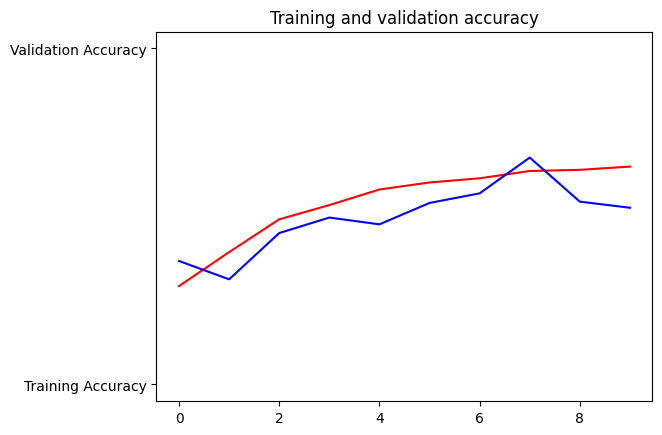

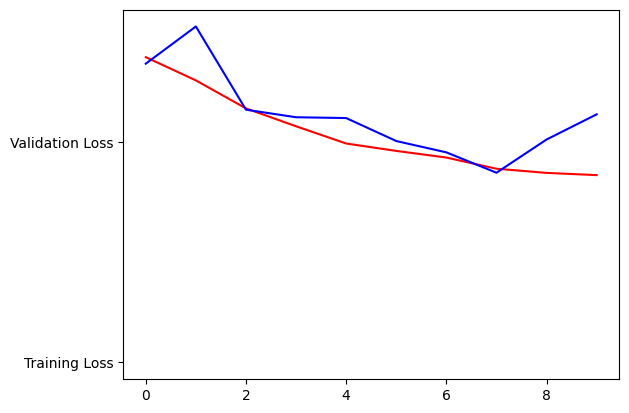

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

# **TRANSFER LEARNING**

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow as tf
import pandas as pd

# Define the input shape
input_shape = (224, 224, 3)

# Create the input layer with float32 data type
input_layer = layers.Input(shape=input_shape, dtype=tf.float32)

# Load the pre-trained InceptionV3 model
pre_trained_model = InceptionV3(input_tensor=input_layer,
                                include_top=False,
                                weights='imagenet')

# Set the layers of the pre-trained model as non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

# Add custom layers on top of the pre-trained model
x = layers.GlobalAveragePooling2D()(pre_trained_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(4, activation='softmax')(x)

# Create the new model with the modified input layer and custom layers
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the summary of the model
model.summary()


87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                  

In [ ]:
# Train the model

history = model.fit(train_generator,
                    epochs=15,
                    steps_per_epoch=len(train_generator),
                    validation_data=val_generator,
                    #verbose=1,
                    validation_steps=len(val_generator)
)

Epoch 1/15
146/146 [==============================] - 2558s 18s/step - loss: 1.0811 - accuracy: 0.5324 - val_loss: 0.7976 - val_accuracy: 0.6786
Epoch 2/15
146/146 [==============================] - 525s 4s/step - loss: 0.8279 - accuracy: 0.6624 - val_loss: 0.6848 - val_accuracy: 0.7383
Epoch 3/15
146/146 [==============================] - 526s 4s/step - loss: 0.7273 - accuracy: 0.7117 - val_loss: 0.6720 - val_accuracy: 0.7351
Epoch 4/15
146/146 [==============================] - 507s 3s/step - loss: 0.6830 - accuracy: 0.7330 - val_loss: 0.6834 - val_accuracy: 0.7260
Epoch 5/15
146/146 [==============================] - 530s 4s/step - loss: 0.6510 - accuracy: 0.7418 - val_loss: 0.6180 - val_accuracy: 0.7539
Epoch 6/15
146/146 [==============================] - 501s 3s/step - loss: 0.6071 - accuracy: 0.7674 - val_loss: 0.6355 - val_accuracy: 0.7500
Epoch 7/15
146/146 [==============================] - 521s 4s/step - loss: 0.5810 - accuracy: 0.7790 - val_loss: 0.6252 - val_accuracy: 0.74

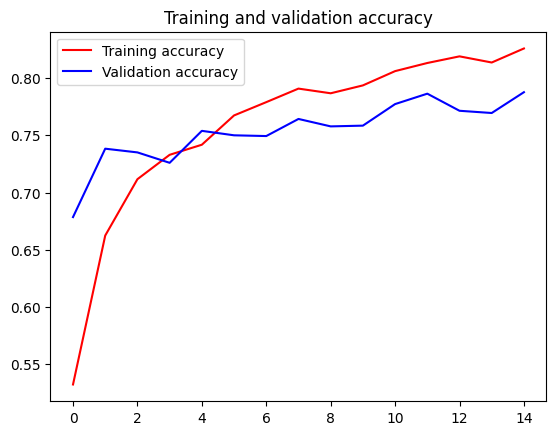

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

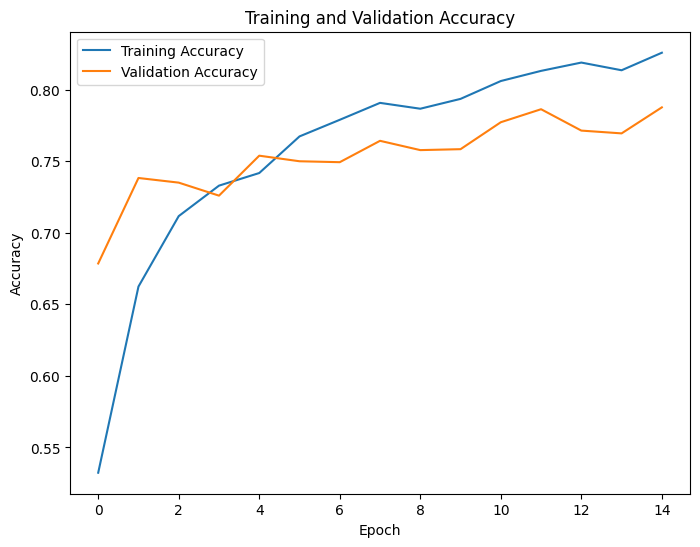

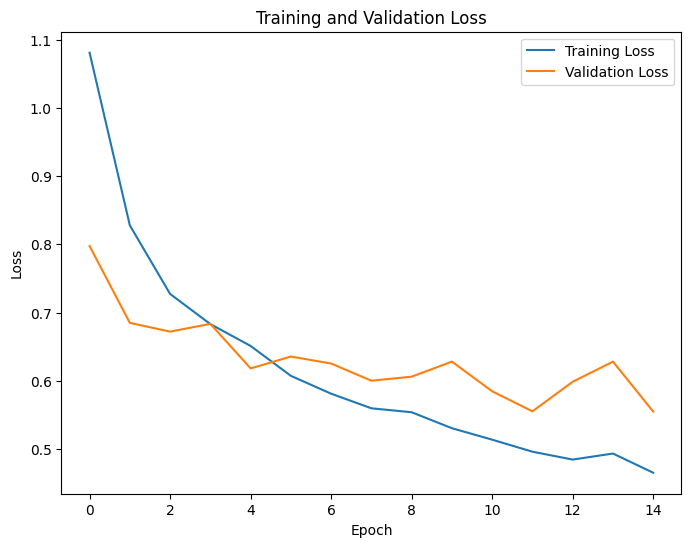

In [ ]:
# Access the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Using **Resnet18**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.keras import Model
import pandas as pd

pre_trained_model = ResNet50(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

for layer in pre_trained_model.layers:
    layer.trainable = False

x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(4, activation='softmax')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f711681c880>,input_3,False
1,<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f70696a9e70>,conv1_pad,False
2,<keras.layers.convolutional.conv2d.Conv2D object at 0x7f7066c3c460>,conv1_conv,False
3,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f707bf9c2e0>,conv1_bn,False
4,<keras.layers.core.activation.Activation object at 0x7f7065c26140>,conv1_relu,False
...,...,...,...
170,<keras.layers.core.activation.Activation object at 0x7f707bd98160>,conv5_block3_2_relu,False
171,<keras.layers.convolutional.conv2d.Conv2D object at 0x7f707bd9aa40>,conv5_block3_3_conv,False
172,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f707bd747f0>,conv5_block3_3_bn,False
173,<keras.layers.merging.add.Add object at 0x7f707bd76710>,conv5_block3_add,False


In [ ]:
# Train the model

history = model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch=len(train_generator),
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    verbose=1)


Epoch 1/10
146/146 [==============================] - 774s 5s/step - loss: 1.4697 - accuracy: 0.2516 - val_loss: 1.3794 - val_accuracy: 0.2669
Epoch 2/10
146/146 [==============================] - 752s 5s/step - loss: 1.3896 - accuracy: 0.2718 - val_loss: 1.3886 - val_accuracy: 0.2481
Epoch 3/10
146/146 [==============================] - 683s 5s/step - loss: 1.3845 - accuracy: 0.2737 - val_loss: 1.3842 - val_accuracy: 0.2481
Epoch 4/10
146/146 [==============================] - 730s 5s/step - loss: 1.3843 - accuracy: 0.2756 - val_loss: 1.3837 - val_accuracy: 0.2747
Epoch 5/10
146/146 [==============================] - 725s 5s/step - loss: 1.3849 - accuracy: 0.2679 - val_loss: 1.3853 - val_accuracy: 0.2825
Epoch 6/10
146/146 [==============================] - 728s 5s/step - loss: 1.3859 - accuracy: 0.2614 - val_loss: 1.3860 - val_accuracy: 0.2370
Epoch 7/10
146/146 [==============================] - 669s 5s/step - loss: 1.3867 - accuracy: 0.2501 - val_loss: 1.3863 - val_accuracy: 0.2591

In [ ]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Predict Model Test

Saving 1709.jpg to 1709.jpg
1/1 [==============================] - 0s 133ms/step


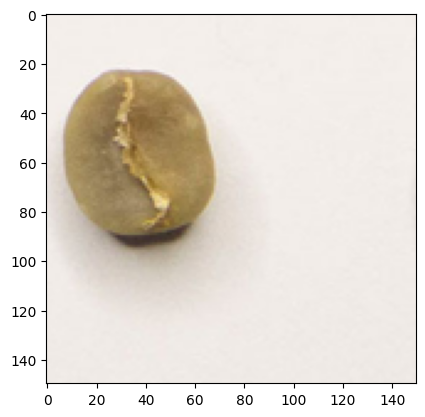

defect: 2.50%
longberry: 0.27%
peaberry: 15.98%
premium: 81.25%


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input
from PIL import Image

labels = train_generator.class_indices.keys()

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = Image.open(path).convert("RGB")
  img = img.resize((150, 150))
  x = np.array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))

# **Save Model to .h5**

In [ ]:
saved_model_path = "/content/drive/Shareddrives/CLICK/Model4/coffeebean_classification.h5"

# Save model h5
model.save(saved_model_path)

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [ ]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, '/content/drive/Shareddrives/CLICK/Model2')


# **Testing the model from h5**

Saving 1667.png to 1667.png
1/1 [==============================] - 2s 2s/step


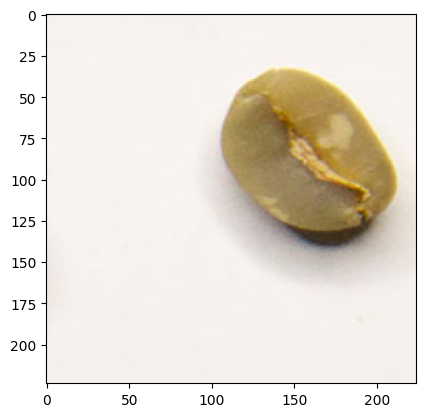

Predicted Label: Premium
Confidence Score: 0.5085586


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model from Google Drive
model_path = '/content/drive/Shareddrives/CLICK/Model2/coffeebean_classification.h5'
model = tf.keras.models.load_model(model_path)

# Define the class labels
class_labels = ["Defect", "Longberry", "Peaberry", "Premium"]

# Function to preprocess and predict on an uploaded image
def preprocess_and_predict(image):
    # Preprocess the image
    img = image.resize((224, 224))
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])

    # Make the prediction
    prediction = model.predict(images)[0]
    predicted_class = np.argmax(prediction)
    class_label = class_labels[predicted_class]
    confidence = prediction[predicted_class]

    # Display the image and prediction result
    plt.imshow(img)
    plt.show()

    print("Predicted Label:", class_label)
    print("Confidence Score:", confidence)

# Upload an image and process it
uploaded = files.upload()

for fn in uploaded.keys():
    # Load the uploaded image
    path = fn
    img = Image.open(path).convert("RGB")

    # Call the preprocessing and prediction function
    preprocess_and_predict(img)


# **Convert H5 to TensorFlowLite**

In [ ]:
import tensorflow as tf
import os

# convert keras model to tflite
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size)+'bytes')

# **Convert the model from .h5 to .tflite**

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load the model using the path
model = keras.models.load_model('/content/drive/Shareddrives/CLICK/Model4/coffeebean_classification.h5')

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('model4.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
!pip install tensorflowjs tensorflow-model-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 28.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: 

# **Testing the model from TFLite**

In [ ]:
interpreter = tf.lite.Interpreter(model_path = '/content/drive/MyDrive/model4.tflite')
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 224 224   3]
Input Type: <class 'numpy.float32'>
Output Shape: [1 4]
Output Type: <class 'numpy.float32'>


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/model4.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(224, 224), interpolation="nearest")
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  interpreter.set_tensor(input_details[0]['index'], images)
  interpreter.invoke()
  classes = interpreter.get_tensor(output_details[0]['index'])

  max = np.amax(classes[0])
  max = np.amax(classes[0])
  if np.where(classes[0] == max)[0] == 0:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('defect')
  elif np.where(classes[0] == max)[0] == 1:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('longberry')
  elif np.where(classes[0] == max)[0] == 2:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('peaberry')
  else:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('premium')

plt.figure(figsize=(13, 13))
for n in range(len(image_name)):
  plt.subplot((len(image_name)//4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(224, 224), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  plt.title(title, color='black')
  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Saving 1933.jpg to 1933.jpg
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-f80196dc9e94>", line 16, in <cell line: 16>
    uploaded = files.upload()
  File "/usr/local/lib/python3.10/dist-packages/google/colab/files.py", line 82, in upload
    with open(local_filename, 'ab') as f:
OSError: [Errno 107] Transport endpoint is not connected: '1933.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-package